In [56]:
import matplotlib.pyplot as plt
import random
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import torch
import torchvision.models as models
import torch.nn as nn
%matplotlib inline
from torchvision.models import ResNet50_Weights
import torchvision

In [57]:
BASE = 'alidata/train/'
vehicle_types = os.listdir(BASE)
print(vehicle_types)

['Microbus', 'Bus', 'Sedan', 'Minivan', 'Truck', 'SUV']


In [58]:
dataset = {}
for vehicle_class in vehicle_types:
    dataset[vehicle_class] = [i for i in os.listdir(BASE + vehicle_class)]

In [59]:
print(dataset.keys())
print(len(dataset.keys()))

dict_keys(['Microbus', 'Bus', 'Sedan', 'Minivan', 'Truck', 'SUV'])
6


In [60]:
df = pd.DataFrame.from_dict(dataset, orient='index')
df = df.transpose()

In [61]:
df.head()

,Microbus,Bus,Sedan,Minivan,Truck,SUV
0,9f751a5d-822b-4469-9156-2b395ff20d50.jpg,6eed7c89-1509-4ea9-aa54-7b4f5e32997e.jpg,125f866d-01bb-4faf-bc03-2ac7d40b5665.jpg,de835b2e-8065-47c3-b509-866dcb6ae2b0.jpg,d080cda8-7775-448a-aa7b-5cc143a0d0a0.jpg,6dcf3bf9-5dcf-4a30-aa97-c19dec999a78.jpg
1,aa640043-bf7a-4d58-9ad4-078944321a8c.jpg,534c5b4b-b15f-4823-90e5-ddb59e2707cf.jpg,e9c23afd-70b9-4de3-9e02-a90065cfe8cc.jpg,1db6b3c8-b27e-4bac-9f07-c9d89ecdbfaf.jpg,40704b31-8e34-4cb3-a3fa-655866b8db16.jpg,3e01d4df-387d-4f58-8bcb-4bb075c13f35.jpg
2,0533b115-8fb1-4b99-a76f-fff6fb655d78.jpg,2832ea01-1d2e-4686-acb0-04ed2913d76b.jpg,0c8fccea-da84-4bcb-aebe-14177e26983a.jpg,afae21be-4fbb-484a-bda0-77a84f15174d.jpg,c4ca29b6-fe0e-435a-824b-de9050f169b1.jpg,20f00833-1d64-4a0b-8475-f4df0a2d0ac3.jpg
3,90c11051-cff7-43de-81d5-88d3395f723d.jpg,72d8d256-9751-4e58-b063-dbd8b48b7d74.jpg,6f4c6403-8f52-4619-a6f5-db6f7e2f55b1.jpg,f1a863e4-c09e-4cb5-99db-b1fd3668639f.jpg,aaeec88d-fe64-4a77-9417-51ea6fbb8775.jpg,e18cb8c3-caad-4893-972a-1a7a837144e3.jpg
4,8ce3c0f6-6ff5-43df-a6db-2573d17b9d23.jpg,898c2fcc-75ca-4c7c-badd-a56d442a5b86.jpg,08f0ea40-c993-4d9d-b8ee-87aa427e3baa.jpg,f5789b83-8286-432a-9899-28e5acad7549.jpg,09091e85-7047-4de8-9bea-e4b5cc1da4e3.jpg,87718bcf-dd51-4007-86b3-b3042130a9ba.jpg


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6651 entries, 0 to 6650
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Microbus  2535 non-null   object
 1   Bus       1533 non-null   object
 2   Sedan     6651 non-null   object
 3   Minivan   785 non-null    object
 4   Truck     1968 non-null   object
 5   SUV       2703 non-null   object
dtypes: object(6)
memory usage: 311.9+ KB


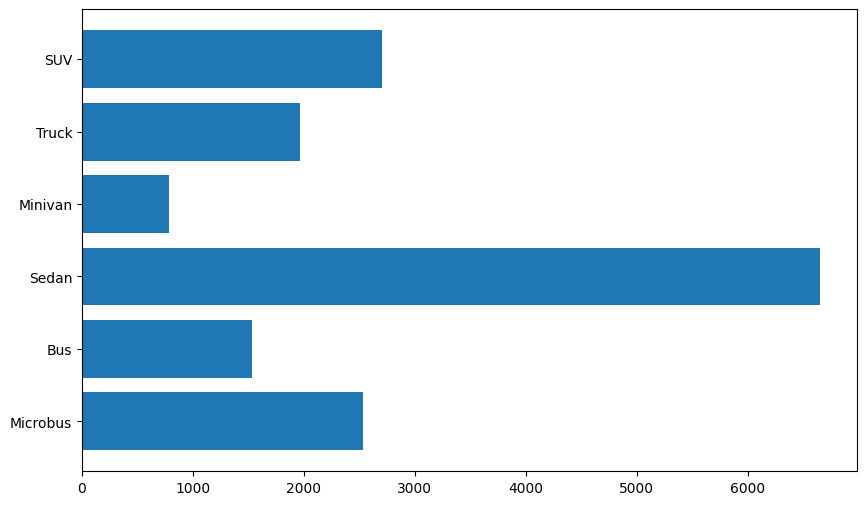

In [63]:
cols = []
col_imgs = []
for col in df.columns:
    cols.append(col)
    col_imgs.append(df[col].count())

plt.figure(figsize=(10,6))
plt.barh(cols, col_imgs)
plt.show()

Displaying 4 random image per vehicle class


<Figure size 640x480 with 0 Axes>

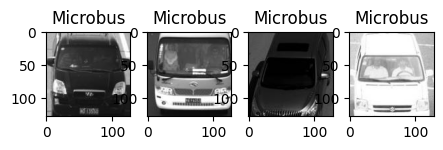

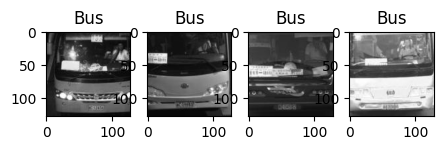

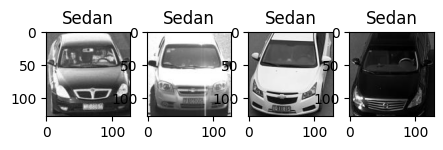

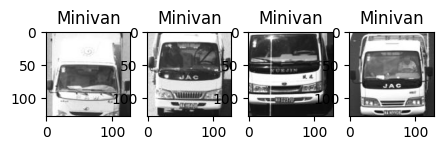

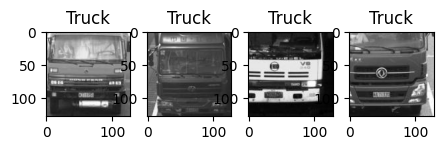

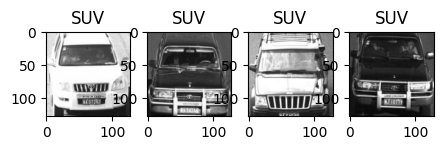

In [64]:
print("="*70)
print("Displaying 4 random image per vehicle class")
print("="*70)

# for every class in `cols`
for j in range(len(vehicle_types)):
    plt.figure(j)
    plt.figure(figsize=(5,5))
    
    # 4 images per every class
    for i in range(4):
        id = "14{}".format(i+1)
        plt.subplot(int(id))
        random_file = random.choice(os.listdir(BASE + cols[j] + "/"))
        img = cv2.imread(BASE + cols[j] + "/" + random_file)
        plt.title(cols[j])
        plt.imshow(img)
plt.show()

In [65]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet's mean and std
])

In [66]:
from torchvision.datasets import ImageFolder

train_data_path = "alidata/train"
val_data_path = "alidata/test"

train_dataset = ImageFolder(root=train_data_path, transform=transform)
val_dataset = ImageFolder(root=val_data_path, transform=transform)


In [67]:
from torch.utils.data import DataLoader

batch_size = 32 

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)


In [68]:
for _, c in val_loader:
    print(_.shape)
    break

torch.Size([32, 3, 224, 224])


In [69]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Pause a bit so that plots are updated


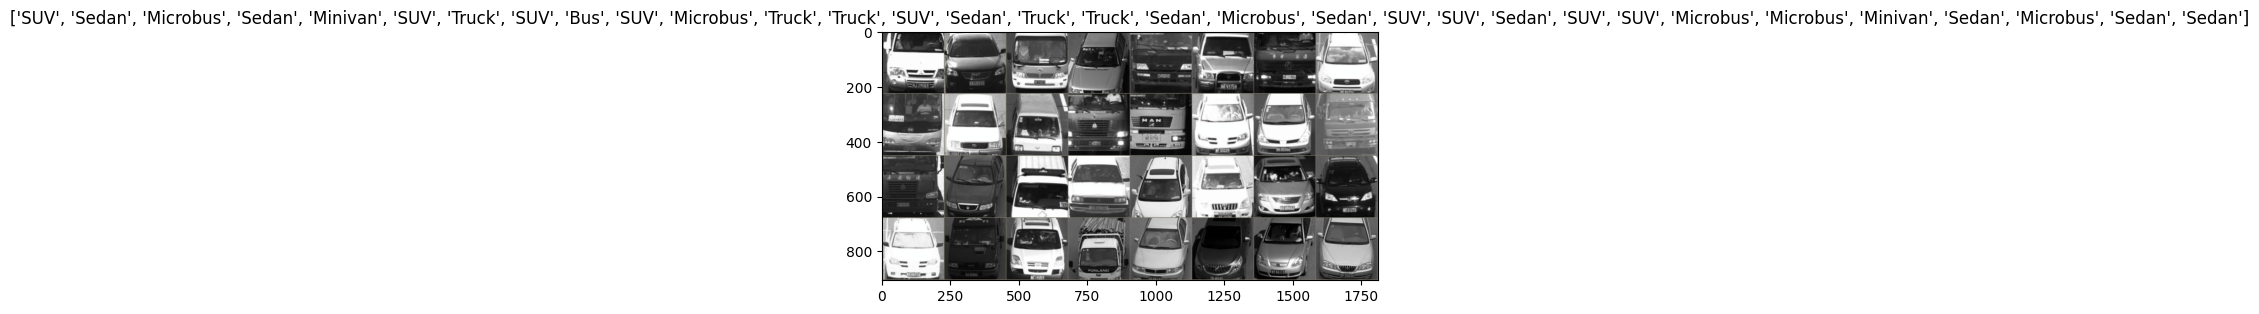

In [70]:
# Get a batch of training data
images, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(images)

imshow(out, title=[train_dataset.classes[x] for x in classes])


In [71]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

weights = ResNet50_Weights.DEFAULT
model = models.resnet50(weights=weights)

# Freeze all layers in the network
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(vehicle_types))

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=3e-4)


In [72]:
print(vehicle_types)

['Microbus', 'Bus', 'Sedan', 'Minivan', 'Truck', 'SUV']


In [54]:
num_epochs = 2

for epoch in range(num_epochs):
    model.train() 
    train_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad() 

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():  # Turn off gradients for validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

    train_loss = train_loss / len(train_loader)
    val_loss = val_loss / len(val_loader)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, '
          f'Val Loss: {val_loss:.4f}')

print('Training complete')


Epoch 1/10, Train Loss: 0.4945, Val Loss: 0.2634
Epoch 2/10, Train Loss: 0.4966, Val Loss: 0.2604
Epoch 3/10, Train Loss: 0.4992, Val Loss: 0.2590
Epoch 4/10, Train Loss: 0.4992, Val Loss: 0.2551
Epoch 5/10, Train Loss: 0.4973, Val Loss: 0.2610


KeyboardInterrupt: 

In [97]:
torch.save(model.state_dict(), 'new_vehicle_classification_model.pth')

In [73]:
device

device(type='cuda', index=0)

In [84]:
model = models.resnet50(weights=None)  # Initialize the model
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(vehicle_types))  # Adjust for the number of classes

model.load_state_dict(torch.load('model-fold-4.pth'))
model = model.to(device)

In [85]:
model.eval() 
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        # print(labels)
        # print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(val_loader)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.6635, Test Accuracy: 79.63%


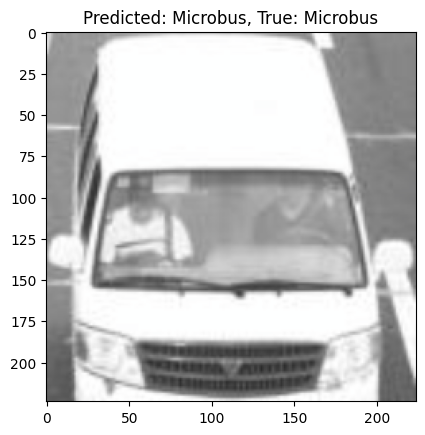

In [118]:
random_idx = random.randint(0, len(val_dataset) - 1)
image, true_label = val_dataset[random_idx]
image_show = image
image_show.numpy().transpose((1,2,0))

image = image.to(device)
with torch.no_grad():
    outputs = model(image.unsqueeze(0))
    _, predicted = torch.max(outputs, 1)
    predicted_label = val_dataset.classes[predicted.item()]

imshow(image_show.cpu(), title=f'Predicted: {predicted_label}, True: {val_dataset.classes[true_label]}')

In [120]:
from sklearn.metrics import classification_report

test_data_path = "alidata/test"
test_dataset = ImageFolder(root=test_data_path, transform=transform)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True, num_workers=4
)


model_path = 'model-fold-4.pth'  # Replace with your model path
model = models.resnet50(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(vehicle_types))
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# Lists to store predictions and true labels
true_labels = []
predictions = []

# Iterate over the test data and make predictions
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.numpy())
        predictions.extend(predicted.cpu().numpy())

# Generate the classification report
report = classification_report(true_labels, predictions, target_names=vehicle_types)
print(report)

              precision    recall  f1-score   support

    Microbus       0.92      0.91      0.92       781
         Bus       0.81      0.73      0.77      1360
       Sedan       0.81      0.20      0.32       435
     Minivan       0.81      0.46      0.58      1253
       Truck       0.77      0.96      0.86      3228
         SUV       0.78      0.94      0.85       955

    accuracy                           0.80      8012
   macro avg       0.82      0.70      0.72      8012
weighted avg       0.80      0.80      0.78      8012

